#### Bertrand's paradox

The Bertrand paradox is generally presented as follows: Consider an equilateral triangle inscribed in a circle. Suppose a chord of the circle is chosen at random. What is the probability that the chord is longer than a side of the triangle?

Bertrand came up with three different ways to choose a random chord, each of which leads to a different answer!

In this notebook, we investigate these methods.






### Method 1

The first method is call the random endpoints method.  The algorithm is as follows:

1. Choose two random points on the circle, at random positions.
2. Calculate the length of the chord that joins them.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

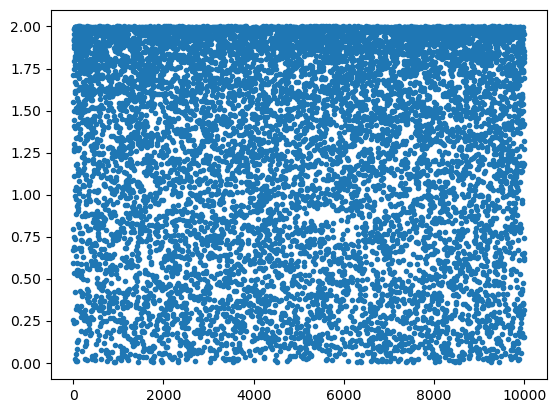

In [14]:
# Generate random points on the circle

n = 10000   # number of points

theta1 = np.random.uniform(0, 2*np.pi, n)
xi1 = np.cos(theta1)
yi1 = np.sin(theta1)

theta2 = np.random.uniform(0, 2*np.pi, n)
xi2 = np.cos(theta2)
yi2 = np.sin(theta2)

length1 = np.sqrt((xi1-xi2)**2 + (yi1-yi2)**2)

plt.plot(np.arange(n), length1, '.')


Method 1 probability = 0.3356


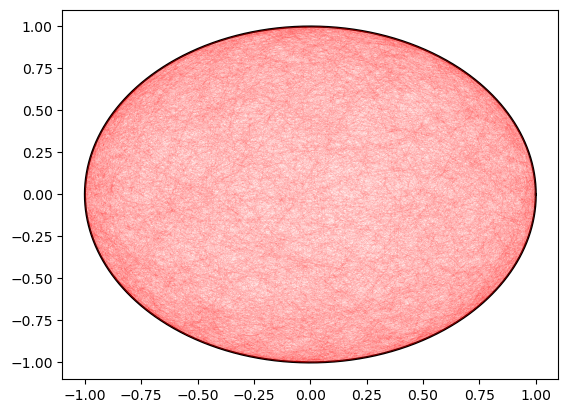

In [15]:
thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
plt.plot(xc, yc, 'k')

count1 = 0
for i in range(n):
    if length1[i] > np.sqrt(3):
        count1 += 1
    plt.plot([xi1[i], xi2[i]], [yi1[i], yi2[i]], 'r', linewidth=0.01)

print(f"Method 1 probability = {count1/n}")

### Method 2

The second method is called the random radial method. The algorithm is as follows:

1. Choose a random point on the circle.
2. Construct the radius from the centre of the circle to this point.
3. Choose a random point on this radius.
4. Construct the chord perpendicular to the radius at this point.
5. Calculate the length of the chord.

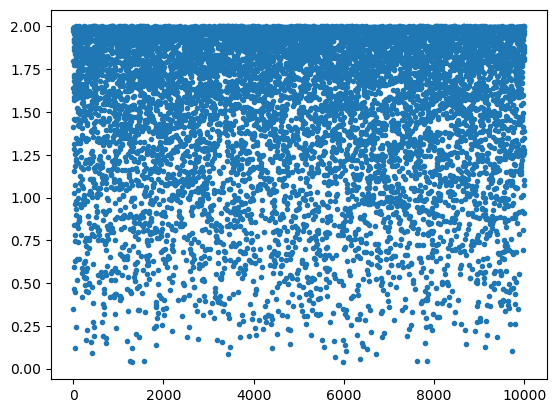

In [16]:


# Step 1 and 2
theta = np.random.uniform(0, 2*np.pi, n)
x = np.cos(theta)
y = np.sin(theta)

# Step 3
fraction = np.random.uniform(0, 1, n)
x1 = fraction*x
y1 = fraction*y

m = -x1/y1
b = y1 - m*x1

# Step 4
# From Wolfram-Alpha, find intersection of circle of radius 1 and the line y = mx + b

xint1 = (-np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
yint1 = m*xint1 + b

xint2 = (np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
yint2 = m*xint2 + b

length2 = np.sqrt((xint1-xint2)**2 + (yint1-yint2)**2)

plt.plot(np.arange(n), length2, '.')

#print (xint1, yint1)
#print (xint2, yint2)

Method 2 probability = 0.5053


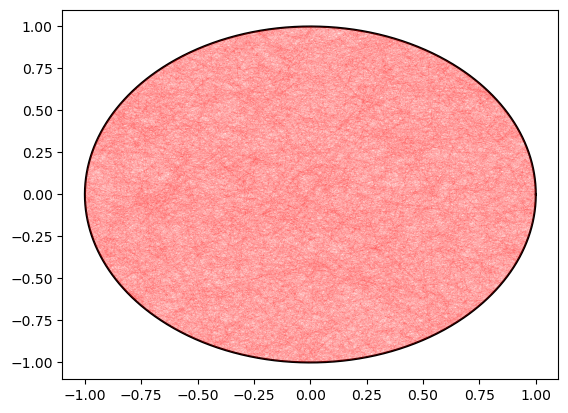

In [17]:
thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
plt.plot(xc, yc, 'k')

count2 = 0
for i in range(n):
    if length2[i] > np.sqrt(3):
        count2 += 1
    plt.plot([xint1[i], xint2[i]], [yint1[i], yint2[i]], 'r', linewidth=0.01)

print(f"Method 2 probability = {count2/n}")

### Method 3

The third method is called the random midpoint method. The algorithm is as follows:

1. Choose a random point within the circle.
2. Construct the chord with this point as its midpoint.
3. Calculate the length of the chord.

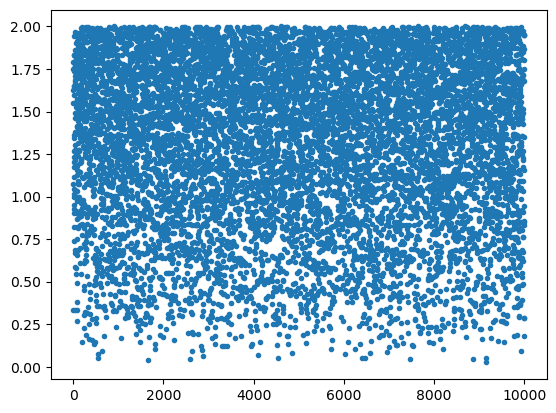

In [18]:
# Step 1
chosen = 0
length3 = np.zeros(n)
xint3 = np.zeros(n)
xint4 = np.zeros(n)
yint3 = np.zeros(n)
yint4 = np.zeros(n)

while chosen < n:
    x1 = np.random.uniform(-1, 1)
    y1 = np.random.uniform(-1, 1)
    radius = np.sqrt(x1**2 + y1**2)

    if radius <= 1:

        # Step 2
        m = -x1/y1
        b = y1 - m*x1

        xint3[chosen] = (-np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
        yint3[chosen] = m*xint3[chosen] + b

        xint4[chosen] = (np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
        yint4[chosen] = m*xint4[chosen] + b

        length3[chosen] = np.sqrt((xint3[chosen]-xint4[chosen])**2 + (yint3[chosen]-yint4[chosen])**2)
        chosen += 1

plt.plot(np.arange(n), length3, '.')


Method 2 probability = 0.2509


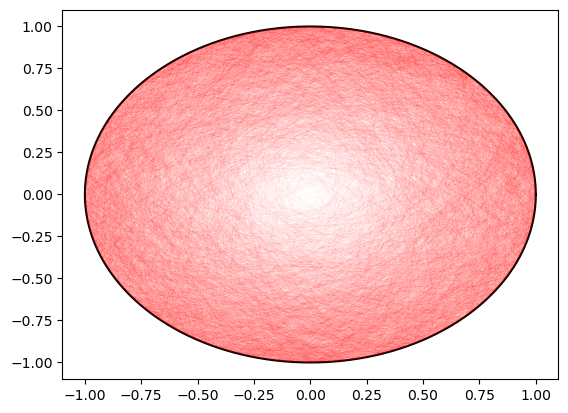

In [19]:
thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
plt.plot(xc, yc, 'k')

count3 = 0
for i in range(n):
    if length3[i] > np.sqrt(3):
        count3 += 1
    plt.plot([xint3[i], xint4[i]], [yint3[i], yint4[i]], 'r', linewidth=0.01)

print(f"Method 2 probability = {count3/n}")

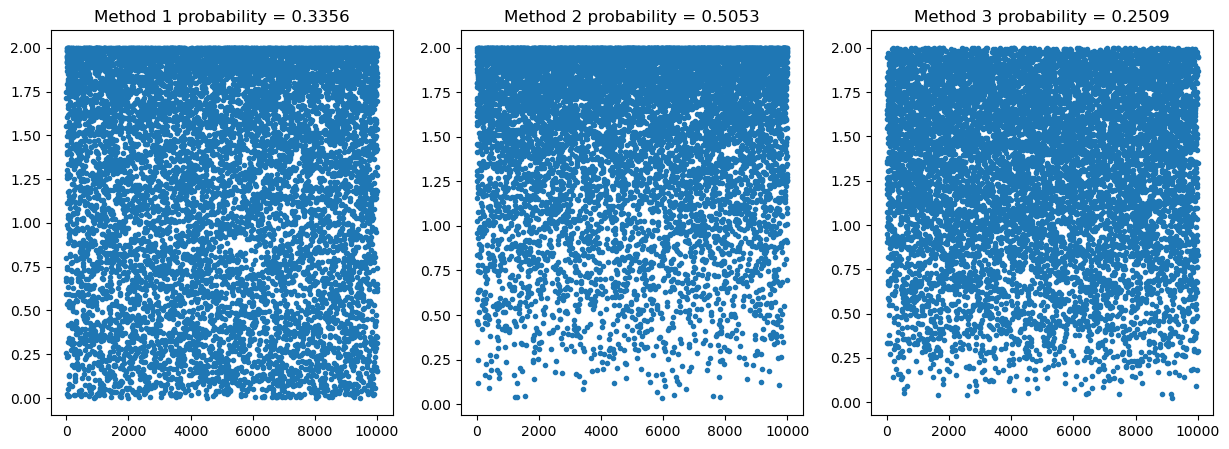

In [20]:
fix, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(np.arange(n), length1, '.')
ax[0].set_title(f"Method 1 probability = {count1/n}")
ax[1].plot(np.arange(n), length2, '.')
ax[1].set_title(f"Method 2 probability = {count2/n}")
ax[2].plot(np.arange(n), length3, '.')
ax[2].set_title(f"Method 3 probability = {count3/n}")
plt.show()

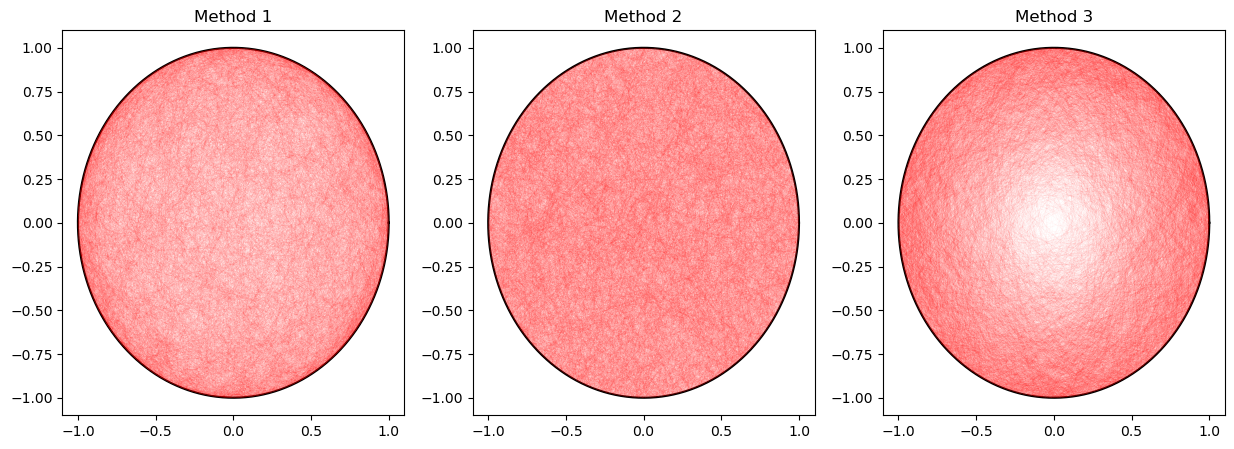

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title("Method 1")
ax[0].plot(xc, yc, 'k')
for i in range(n):
    ax[0].plot([xi1[i], xi2[i]], [yi1[i], yi2[i]], 'r', linewidth=0.01)

ax[1].set_title("Method 2")
ax[1].plot(xc, yc, 'k')
for i in range(n):
    ax[1].plot([xint1[i], xint2[i]], [yint1[i], yint2[i]], 'r', linewidth=0.01)

ax[2].set_title("Method 3")
ax[2].plot(xc, yc, 'k')
for i in range(n):
    ax[2].plot([xint3[i], xint4[i]], [yint3[i], yint4[i]], 'r', linewidth=0.01)